In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import mplcyberpunk
from sklearn_extra.cluster import KMedoids

from matplotlib.patches import Patch

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


Champions' winrates

In [4]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

,champion,win rate,matches,image
1,LeeSin,0.57,106.0,/home/bambito9/Esports-Data-Analysis/API Reque...
10,Vi,0.52,63.0,/home/bambito9/Esports-Data-Analysis/API Reque...
12,Gragas,0.60,57.0,/home/bambito9/Esports-Data-Analysis/API Reque...
3,Elise,0.60,53.0,/home/bambito9/Esports-Data-Analysis/API Reque...
4,MonkeyKing,0.57,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
11,Sylas,0.51,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
2,Nidalee,0.48,50.0,/home/bambito9/Esports-Data-Analysis/API Reque...
9,Kindred,0.52,48.0,/home/bambito9/Esports-Data-Analysis/API Reque...
8,Maokai,0.66,47.0,/home/bambito9/Esports-Data-Analysis/API Reque...
25,Viego,0.55,42.0,/home/bambito9/Esports-Data-Analysis/API Reque...


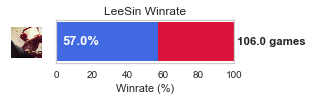

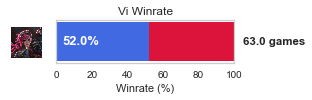

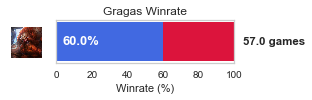

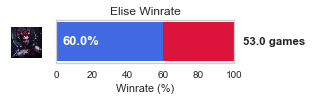

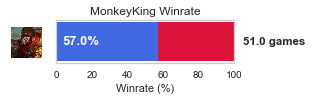

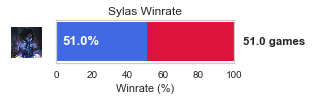

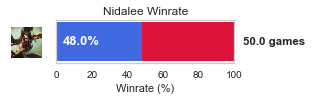

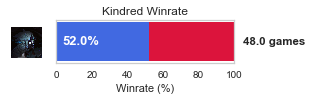

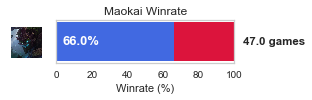

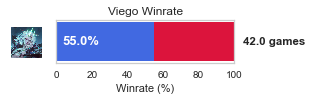

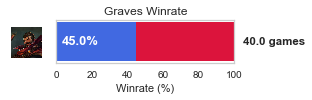

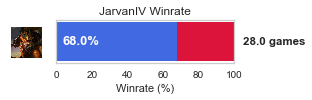

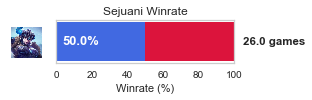

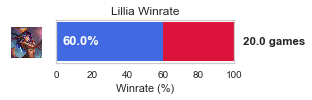

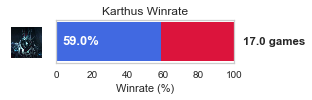

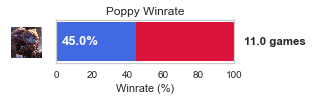

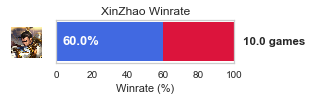

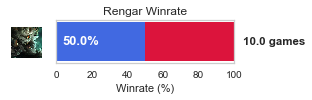

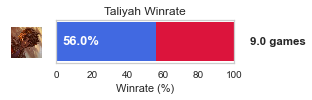

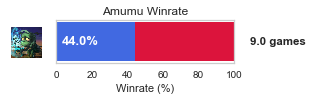

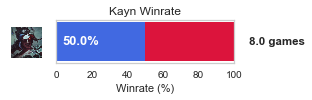

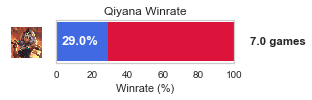

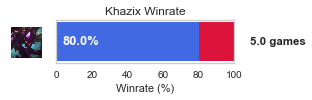

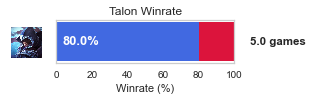

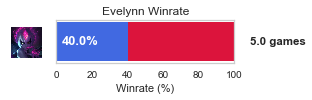

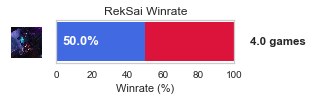

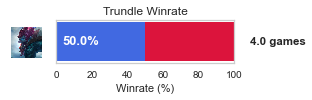

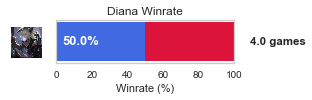

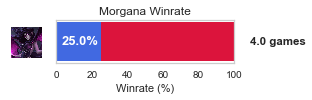

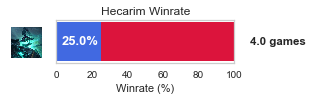

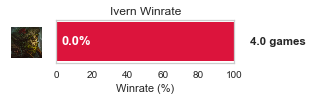

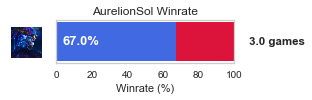

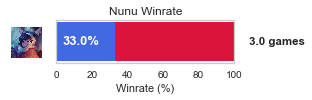

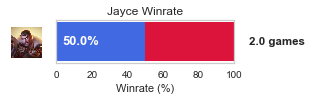

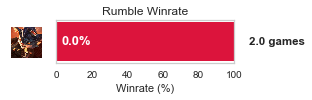

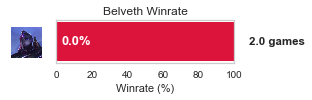

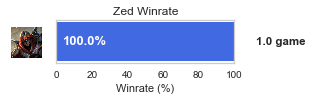

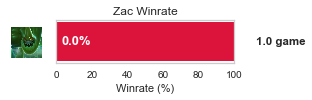

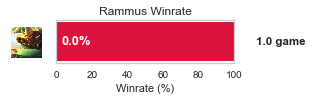

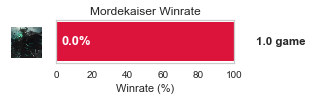

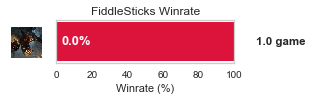

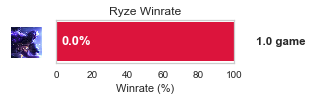

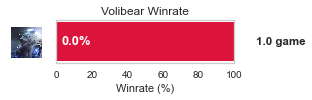

In [8]:
import matplotlib.offsetbox as offsetbox

# Create a separate plot for each champion
for champion_name, winrate, champion_image, games_played in zip(champsWinrates_df["champion"], champsWinrates_df["win rate"], champsWinrates_df["image"], champsWinrates_df["matches"]):
    fig, ax = plt.subplots(figsize=(5, 1.5))

    # Adding the second color until the limit of x-axis (100)
    ax.barh([champion_name], [100], left=[winrate], color="crimson")

    # Plotting the winrate data
    ax.barh([champion_name], [winrate*100], color = "royalblue")


    # Set x-axis limits
    ax.set_xlim(0, 100)

    # Adding champion image to the y-axis tick label
    imagebox = offsetbox.OffsetImage(plt.imread(champion_image), zoom=0.08)  # Adjust the zoom value for image size
    #ab = offsetbox.AnnotationBbox(imagebox, (0, 0), frameon=False)
    ab = offsetbox.AnnotationBbox(imagebox, (-30, 20),xycoords='axes points', frameon=False)

    
    ax.add_artist(ab)

    # Set y-axis tick labels to champion name
    ax.set_yticks([])

    # Increase spacing between y-axis tick labels
    #ax.yaxis.set_tick_params(pad=50, labelsize=8)  # Adjust the pad and labelsize values


    # Set plot title and labels
    plt.title(f"{champion_name} Winrate")
    plt.xlabel("Winrate (%)")
    plt.ylabel("")

    # Add winrate value as annotation on the bar
    ax.annotate(f'{winrate*100:.1f}%', xy=(winrate, 0), xytext=(5, 0), textcoords='offset points', va='center', color = "white", fontweight = "bold", fontsize = 13)

    if(games_played > 1):
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} games', ha='right', va='center', fontweight = "bold", fontsize = 11.5)
    else:
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} game', ha='right', va='center', fontweight = "bold", fontsize = 11.5)

    # Remove the grid
    ax.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [9]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [10]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [11]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [12]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [13]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

359

In [14]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 19 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 32 matches
anonymous 30 played 30 matches
anonymous 31 played 21 matches
anonymous 32 played 24 matches
anonymous 34 played 27 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 20 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 16 matches
anonymous 50 played 16 matches
anonymous 51 played 9 matches


In [15]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [16]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [17]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [18]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

462

In [19]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 39 matches
anonymous 26 played 43 matches
anonymous 27 played 17 matches
anonymous 28 played 11 matches
anonymous 29 played 34 matches
anonymous 30 played 26 matches
anonymous 31 played 42 matches
anonymous 32 played 34 matches
anonymous 34 played 28 matches
anonymous 35 played 17 matches
anonymous 36 played 25 matches
anonymous 37 played 17 matches
anonymous 41 played 17 matches
anonymous 43 played 14 matches
anonymous 46 played 10 matches
anonymous 48 played 20 matches
anonymous 49 played 28 matches
anonymous 50 played 8 matches
anonymous 51 played 7 matches


In [20]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [21]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the results

In [51]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungler Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungler Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    #silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [23]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [24]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [25]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [26]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [27]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

function that returns a radar plot with champion's deaths in each cluster:

In [28]:
def radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors):

    radar_df = champs_deaths_df_0.merge(champs_deaths_df_1, how="outer")
    radar_df = radar_df.merge(champs_deaths_df_2, how="outer")
    radar_df = pd.pivot_table(radar_df, index='cluster', columns='champion', values='deaths', aggfunc='sum', fill_value=0)

    radar_list = radar_df.values.tolist()
    radar_labels = radar_df.keys()
    radar_labels = radar_labels.tolist()

    cluster_0 = [*radar_list[0], radar_list[0][0]]
    cluster_1 = [*radar_list[1], radar_list[1][0]]
    cluster_2 = [*radar_list[2], radar_list[2][0]]
    champs = [*radar_labels, radar_labels[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(champs))

    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

        ax.plot(label_loc, cluster_0, lw=2, color = cluster_colors[0])
        ax.plot(label_loc, cluster_1, lw=2, color = cluster_colors[1])
        ax.plot(label_loc, cluster_2, lw=2, color = cluster_colors[2])

        ax.fill(label_loc, cluster_0, alpha=0.3, color = cluster_colors[0])
        ax.fill(label_loc, cluster_1, alpha=0.3, color = cluster_colors[1])
        ax.fill(label_loc, cluster_2, alpha=0.3, color = "gold")

        lines, labels = plt.thetagrids(np.degrees(label_loc), labels=champs)

        ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

        ax.spines['polar'].set_linewidth(3)
        
        edge_color = (1, 1, 1, 0.2) 
        ax.spines['polar'].set_color(edge_color) 
        
        ax.grid(color='white', alpha=0.3)
        
        ax.set_ylim(0, 60)
        
        # Create custom legend handles
        cluster_0_legend = Patch(facecolor=cluster_colors[0], alpha=0.5, label='Cluster 0')
        cluster_1_legend = Patch(facecolor=cluster_colors[1], alpha=0.5, label='Cluster 1')
        cluster_2_legend = Patch(facecolor=cluster_colors[2], alpha=0.5, label='Cluster 2')
        
        # Add a legend with custom position and handles
        ax.legend(handles=[cluster_0_legend, cluster_1_legend, cluster_2_legend],
                bbox_to_anchor=(1.3, 0.2), fontsize=20, 
                frameon=True)


        plt.show()

---
### Clustering Red Team Victory

In [29]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6253,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,23.224517,5090.0,9540.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [30]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [31]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [32]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

59.523809523809526

In [33]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

47.39296311996608

In [34]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 4.25 deaths per game when winning on the red side

anonymous 25 won 15 matches on the red side
anonymous 25 has an average of 5.133333333333334 deaths per game when winning on the red side

anonymous 26 won 26 matches on the red side
anonymous 26 has an average of 3.8461538461538463 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 6.0 deaths per game when winning on the red side

anonymous 28 won 6 matches on the red side
anonymous 28 has an average of 3.6666666666666665 deaths per game when winning on the red side

anonymous 29 won 24 matches on the red side
anonymous 29 has an average of 4.375 deaths per game when winning on the red side

anonymous 30 won 16 matches on the red side
anonymous 30 has an average of 3.125 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average of 5.9

In [35]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 275 matches in which the jungler died at least once
20 players died a total of 1118 times on the red side
Victory games on red side contains an average of 4.065454545454545 deaths per game


In [36]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6038,7396.0,6838.0,5.124400
6041,10140.0,2505.0,6.737800
6221,4114.0,7822.0,7.901383
6226,5128.0,3384.0,10.258183
6253,5090.0,9540.0,23.224517
...,...,...,...
275607,6048.0,5969.0,22.257083
275614,6742.0,4329.0,25.482650
275648,4159.0,10322.0,12.092683
275750,5575.0,8675.0,12.166683


Time discretization

In [37]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [38]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [39]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [40]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [41]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6038,0.103240,0.106336,-1
6041,0.920986,-1.207649,-1
6221,-0.874837,0.404735,-1
6226,-0.572653,-0.941092,-1
6253,-0.583977,0.925720,0
...,...,...,...
275607,-0.298481,-0.157189,0
275614,-0.091660,-0.654520,1
275648,-0.861427,1.162862,-1
275750,-0.439441,0.663408,-1


In [42]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), model.labels_)))

Silhouette score for k=2: 0.32509679800773716
Silhouette score for k=3: 0.21434858931071973
Silhouette score for k=4: 0.29426602361597626
Silhouette score for k=5: 0.26659973589040864
Silhouette score for k=6: 0.23783578170691322
Silhouette score for k=7: 0.2620504354766739
Silhouette score for k=8: 0.30207595207420945
Silhouette score for k=9: 0.3103391446220233
Silhouette score for k=10: 0.2849603260949895
Silhouette score for k=11: 0.28964910532478005
Silhouette score for k=12: 0.28638571853722283
Silhouette score for k=13: 0.28863373977856444
Silhouette score for k=14: 0.2940915207696635
Silhouette score for k=15: 0.2864616077591919
Silhouette score for k=16: 0.27454762975963404
Silhouette score for k=17: 0.28150071279972505
Silhouette score for k=18: 0.27564876233090385
Silhouette score for k=19: 0.25837787882544155
Silhouette score for k=20: 0.24822618976133742
Silhouette score for k=25: 0.24556901265963324


[2 3 4 5 6 7 8 9]


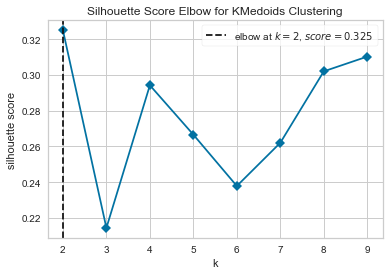

<Axes: title={'center': 'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
ks = np.arange(2,10, 1)
print(ks)
model = KMedoids()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

K-Means with k = 3

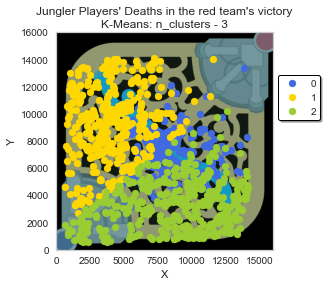

Silhouette score: 0.21434858931071973
2    422
1    402
0    294
Name: cluster, dtype: int64

Inertia: 1205.1980010270563

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8385.738095,6978.102041,-0.867347
1,1,4218.927861,9375.937811,-0.129353
2,2,8815.180095,3393.751185,-0.175355


In [53]:
# Apply K-means clustering
model = KMedoids(n_clusters=3, random_state=42)
model.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = model.labels_
profiling_df["cluster"] = model.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), model, "red team's", model, cluster_colors,"victory")

print("\nInertia: {}\n".format(model.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [54]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2071.042070,1699.800774,0.339199
1,1,2010.014043,2493.394517,0.707588
2,2,3316.562670,1785.188068,0.703787


In [55]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14076.0,3565.0,13413.0,3179.0,0,-1
1,1,11559.0,678.0,14089.0,2725.0,1,-1
2,2,14129.0,680.0,10246.0,572.0,1,-1


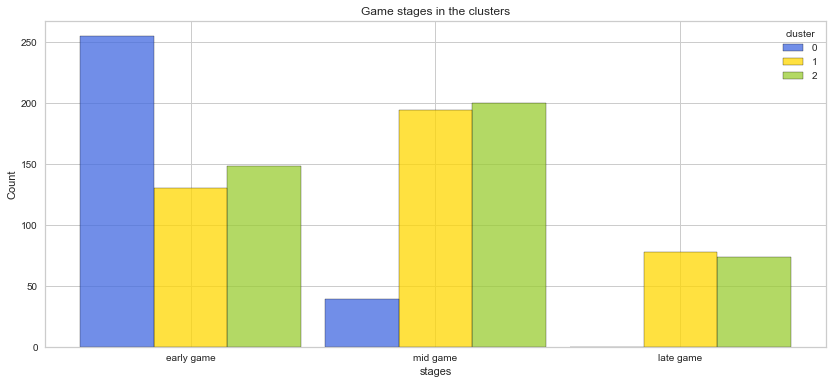

In [56]:
stagesPerClusterV2(redSideVictory_df, colors)

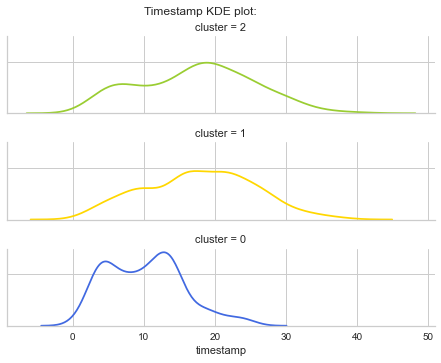

In [57]:
kdeTimestamp(profiling_df, cluster_colors)